In [2]:
import numpy as np 
import pandas as pd 
import spacy
import nltk
import re 
import seaborn as sns
import string
from nltk.corpus import stopwords
stop=stopwords.words("english")
from nltk.stem import PorterStemmer
pos_stem=PorterStemmer()
from tkinter import *
import tkinter as tk
import tkinter.ttk as Combobox
from PIL import Image, ImageTk
import tkinter as tkinter



In [3]:
df=pd.read_csv(r"C:\Users\KINGNICKS-DELL\Desktop\Restuarant review\Restaurant_Reviews.csv")

In [4]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df["Liked"]=df["Liked"].map({1:"Liked",0:"Disliked"})

In [8]:
df

,Review,Liked
0,Wow... Loved this place.,Liked
1,Crust is not good.,Disliked
2,Not tasty and the texture was just nasty.,Disliked
3,Stopped by during the late May bank holiday of...,Liked
4,The selection on the menu was great and so wer...,Liked
...,...,...
995,I think food should have flavor and texture an...,Disliked
996,Appetite instantly gone.,Disliked
997,Overall I was not impressed and would not go b...,Disliked
998,"The whole experience was underwhelming, and I ...",Disliked


<Axes: xlabel='Liked'>

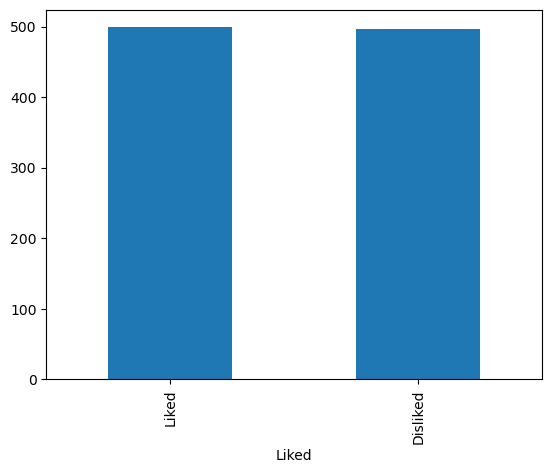

In [9]:
df["Liked"].value_counts().plot(kind='bar')

In [10]:
df["len"]=df["Review"].apply(len)

In [11]:
df

,Review,Liked,len
0,Wow... Loved this place.,Liked,24
1,Crust is not good.,Disliked,18
2,Not tasty and the texture was just nasty.,Disliked,41
3,Stopped by during the late May bank holiday of...,Liked,87
4,The selection on the menu was great and so wer...,Liked,59
...,...,...,...
995,I think food should have flavor and texture an...,Disliked,66
996,Appetite instantly gone.,Disliked,24
997,Overall I was not impressed and would not go b...,Disliked,50
998,"The whole experience was underwhelming, and I ...",Disliked,91


In [12]:
df.query('Liked=="Liked"')["len"].mean()

55.95591182364729

In [13]:
df.query('Liked=="Disliked"')["len"].mean()

60.9738430583501

In [14]:
a=df.head(10).plot

<Axes: xlabel='Liked', ylabel='len'>

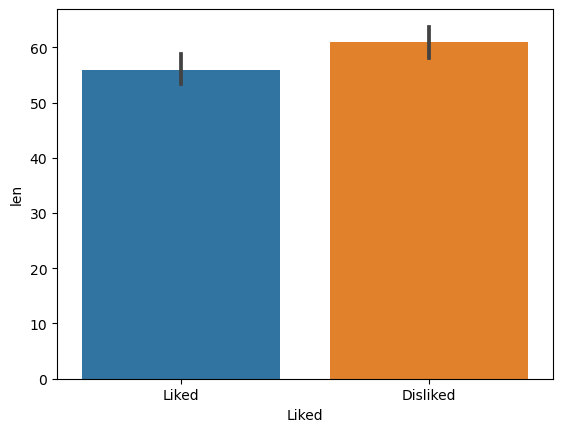

In [15]:
sns.barplot(x=df["Liked"],y=df["len"])

In [16]:
def clean(text):
    review=text.lower()
    review=re.sub('[^a-zA-z]',' ',review)
    review=review.split()    
    review=[ i for i in review if i not in string.punctuation]
    review=[pos_stem.stem(word) for word in review]
    review=" ".join(review)
    
    return review
    

In [17]:
df["cleaned_text"]=df["Review"].apply(lambda X:clean(X))

In [18]:
df

,Review,Liked,len,cleaned_text
0,Wow... Loved this place.,Liked,24,wow love thi place
1,Crust is not good.,Disliked,18,crust is not good
2,Not tasty and the texture was just nasty.,Disliked,41,not tasti and the textur wa just nasti
3,Stopped by during the late May bank holiday of...,Liked,87,stop by dure the late may bank holiday off ric...
4,The selection on the menu was great and so wer...,Liked,59,the select on the menu wa great and so were th...
...,...,...,...,...
995,I think food should have flavor and texture an...,Disliked,66,i think food should have flavor and textur and...
996,Appetite instantly gone.,Disliked,24,appetit instantli gone
997,Overall I was not impressed and would not go b...,Disliked,50,overal i wa not impress and would not go back
998,"The whole experience was underwhelming, and I ...",Disliked,91,the whole experi wa underwhelm and i think we ...


In [19]:
x=df["cleaned_text"]
y=df["Liked"]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv=CountVectorizer(max_features=1500)

In [22]:
cv.fit(x)

CountVectorizer(max_features=1500)

In [23]:
X=cv.transform(x)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=.80,random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [27]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
RDF=RandomForestClassifier()
SVC=SVC()
GB=GaussianNB()

In [28]:
LR.fit(xtrain,ytrain)

LogisticRegression()

In [29]:
print(accuracy_score(ytrain,LR.predict(xtrain)))
print(accuracy_score(ytest,LR.predict(xtest)))
print(classification_report(ytest,LR.predict(xtest)))

0.9836683417085427
0.785
              precision    recall  f1-score   support

    Disliked       0.74      0.83      0.78        93
       Liked       0.83      0.75      0.79       107

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200



In [30]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
print(accuracy_score(ytrain,DT.predict(xtrain)))
print(accuracy_score(ytest,DT.predict(xtest)))

1.0
0.745


In [32]:
RDF.fit(xtrain,ytrain)

RandomForestClassifier()

In [33]:
print(accuracy_score(ytrain,RDF.predict(xtrain)))
print(accuracy_score(ytest,RDF.predict(xtest)))
print(classification_report(ytest,RDF.predict(xtest)))

1.0
0.765
              precision    recall  f1-score   support

    Disliked       0.71      0.85      0.77        93
       Liked       0.84      0.69      0.76       107

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.78      0.77      0.76       200



In [34]:
model=RDF.fit(X,y)


In [35]:
import joblib

In [36]:
joblib.dump(model,"Restaurant_Reviews_Prediction.pkl")

['Restaurant_Reviews_Prediction.pkl']

In [38]:
Review=Tk()
Review.title("Restaurant_Reviews_Prediction")
Review.geometry("1000x700")
Review.maxsize(height=700,width=1000)
image=PhotoImage(file=r"H:\vscode\.vscode\Restaurant_Reviews_Prediction\Diving_Into_the_Customer_Satisfaction_Survey_hero.png")
labeli=Label(Review,image=image).place(x=-300,y=-200)
#labels and entrybox
label1=Label(Review,text="Enter Your Text-",bg="DodgerBlue2",font=("timesnewromans,12")).place(x=200,y=550)
e1=Entry(Review,bd=5,font=("timesnewromans",12),width=40)
e1.place(x=330,y=545)
e2=Entry(Review,width=5,font=("timesnewromans",20,"bold"),justify="center")
e2.place(x=430,y=170)
def check():
    p1=Entry.get(e1)
    print(p1)
    input=p1
    input_c=clean(input)
    input_vec=cv.transform([input_c])
    Model=joblib.load("Restaurant_Reviews_Prediction.pkl")
    prediction=Model.predict(input_vec)
    if prediction=="Disliked":
        Entry.insert(e2,0,"👎")
    if prediction=="Liked":
        Entry.insert(e2,0,"👍")    
def reset():
    e1.delete(0,END)
    e2.delete(0,END)
button=Button(Review,text="Submit",bg="red",font=("timesnewromans",9),bd=10,command=check)
button.place(x=200,y=620)
button=Button(Review,text="Reset",bg="red",font=("timesnewromans",9),bd=10,command=reset)
button.place(x=300,y=620)
Review.mainloop()

food was good
food was not good
food was not good
